In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle

#  Data loading and understading

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(800, 22)

In [4]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [5]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

#### convert age to inetger

In [9]:
df['age']=df['age'].astype('int')

In [10]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [11]:
for col in df.columns:
    print(col)

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
ethnicity
jaundice
austim
contry_of_res
used_app_before
result
age_desc
relation
Class/ASD


In [12]:
for col in df.columns:
    num_features=['age','ID','result','A10_Score','A9_Score','A8_Score','A7_Score','A6_Score','A5_Score','A4_Score','A3_Score','A2_Score','A1_Score']
    if col not in num_features:
        print(col,df[col].unique())
        print('-'*50)

gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim ['no' 'yes']
--------------------------------------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cy

### Drop ID & age_desc

In [13]:
df.drop(['age_desc','ID'],inplace=True,axis=1)

In [14]:
df.shape

(800, 20)

In [15]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [16]:
mapping={
    'Viet Nam':'Vietnam',
    'AmericanSamoa':'United States',
    'Hong Kong':'China'
}

In [17]:
df['contry_of_res']=df['contry_of_res'].replace(mapping)

In [18]:
df.contry_of_res.unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [19]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [20]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [21]:
sns.set_theme(style='darkgrid')

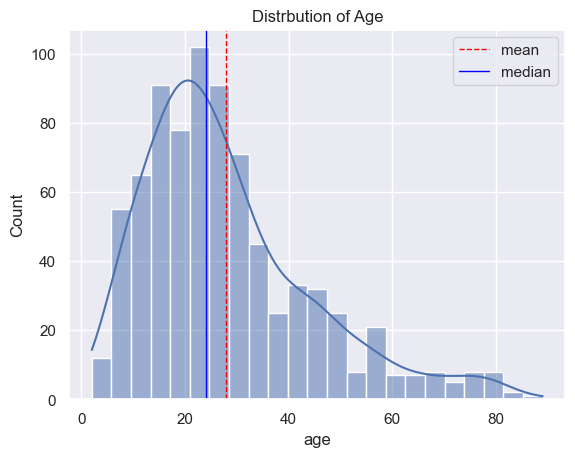

In [22]:
sns.histplot(df['age'],kde=True)
plt.title('Distrbution of Age')
age_mean=df['age'].mean()
age_median=df['age'].median()
plt.axvline(age_mean,color='red',linestyle='--',label='mean',linewidth=1)
plt.axvline(age_median,color='blue',linestyle='-',label='median',linewidth=1)
plt.legend()
plt.show()

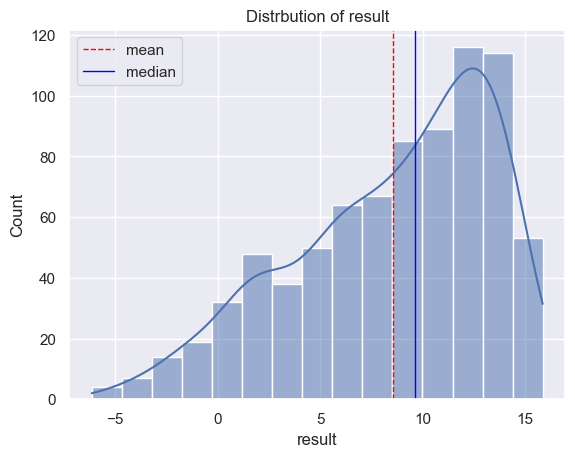

In [23]:
sns.histplot(df['result'],kde=True)
plt.title('Distrbution of result')
result_mean=df['result'].mean()
result_median=df['result'].median()
plt.axvline(result_mean,color='red',linestyle='--',label='mean',linewidth=1)
plt.axvline(result_median,color='blue',linestyle='-',label='median',linewidth=1)
plt.legend()
plt.show()

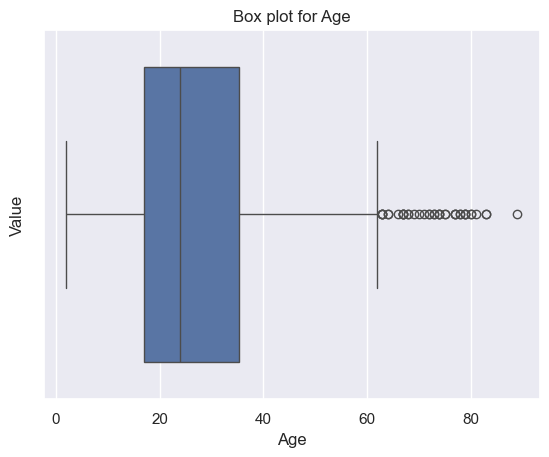

In [24]:
sns.boxplot(x=df['age'])
plt.title('Box plot for Age')
plt.xlabel('Age')
plt.ylabel('Value')  
plt.show()

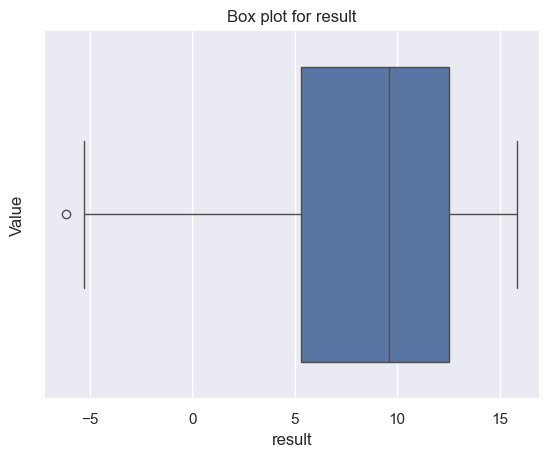

In [25]:
sns.boxplot(x=df['result'])
plt.title('Box plot for result')
plt.xlabel('result')
plt.ylabel('Value')  
plt.show()

#### count the outlier using IQR method

In [26]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

age_outlier=df[(df['age']<lower_bound)|(df['age']>upper_bound)]
len(age_outlier)

39

In [27]:
Q1=df['result'].quantile(0.25)
Q3=df['result'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

result_outlier=df[(df['result']<lower_bound)|(df['result']>upper_bound)]
len(result_outlier)

1

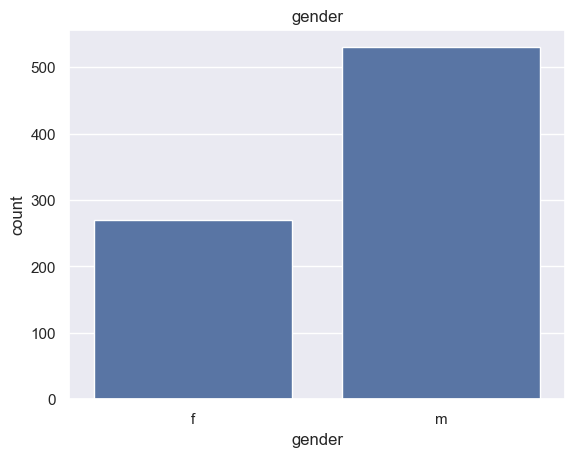

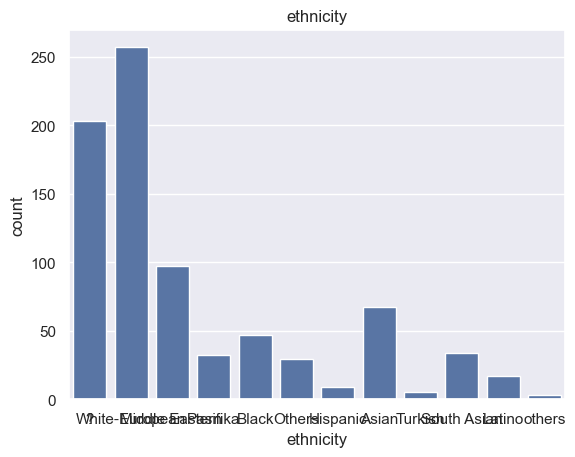

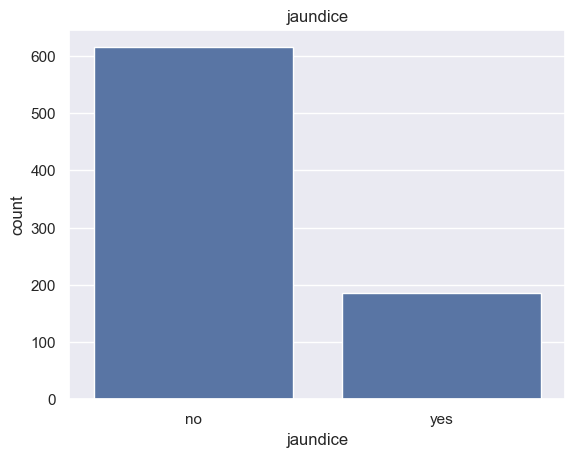

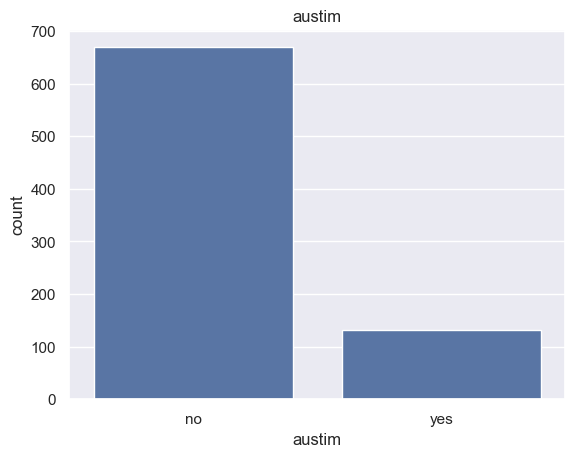

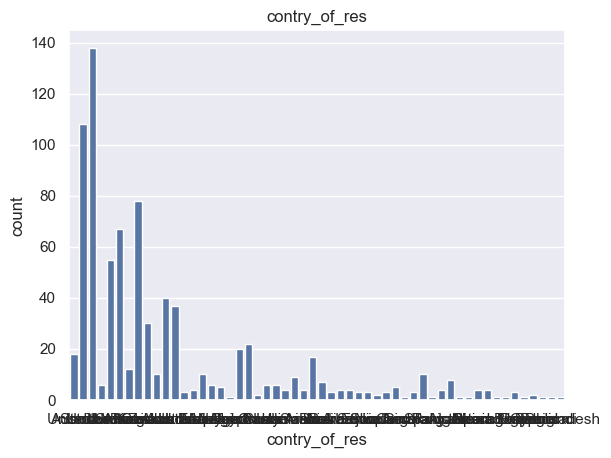

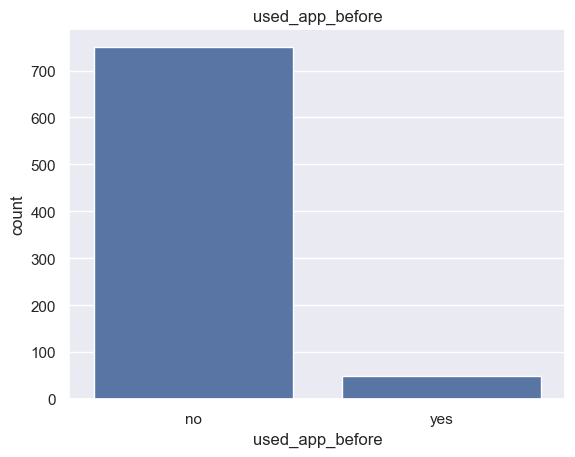

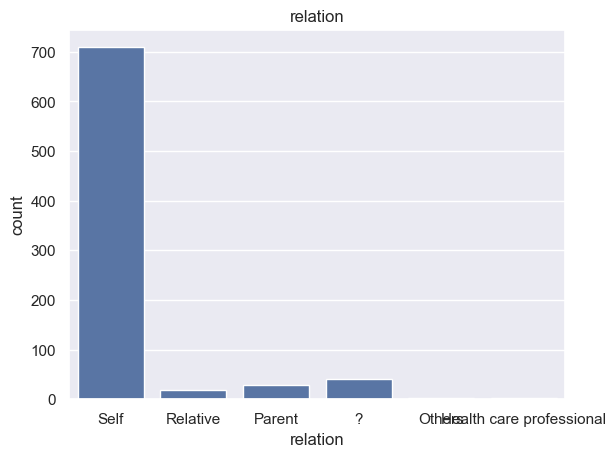

In [28]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

### handling the missing values in realtion & ethincity

In [29]:
df['ethnicity']=df['ethnicity'].replace({'?':'Others','others':'Others'})

In [30]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [31]:
df['relation']=df['relation'].replace({'?':'Others','Relative':'Others','Parent':'Others','Health care professional':'Others'})

# Label Encoder

In [32]:
object_columns=df.select_dtypes(include=["object"]).columns
encoder={}
for col in object_columns:
    label_encoder=LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])
    encoder[col]=label_encoder

In [39]:
with open("encoders.pkl","wb") as f:
    pickle.dump(encoder,f)

# **Bivariate Analysis**
### correlation matrix

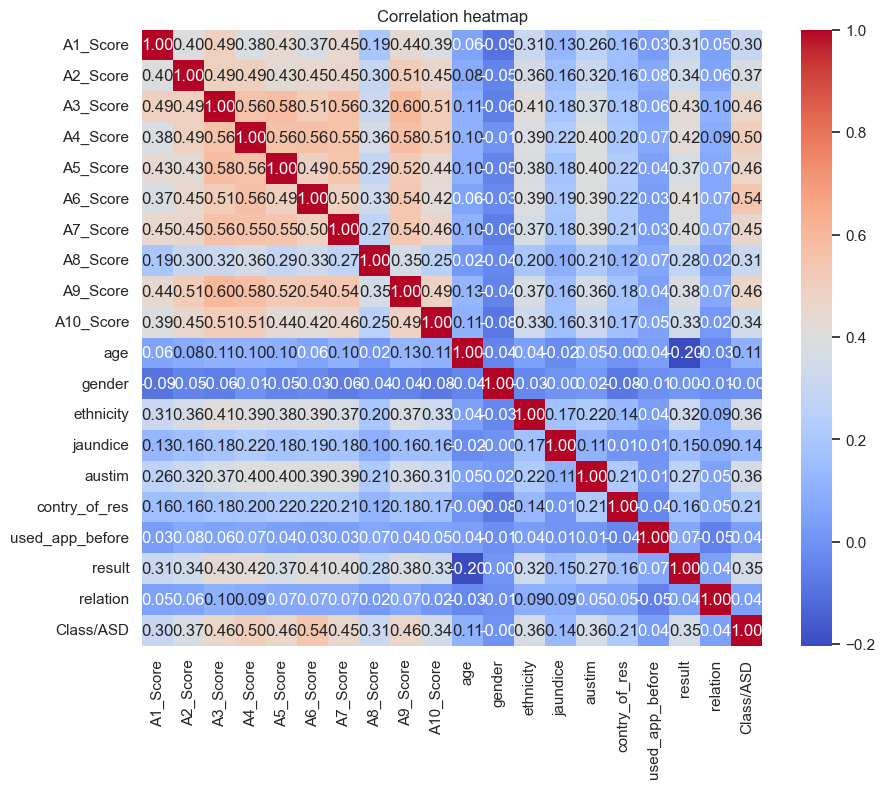

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [42]:
def replace_outliers_with_median(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    median=df[column].median()
    df[column]=df[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)
    return df

In [44]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [48]:
df=replace_outliers_with_median(df,'age')
df=replace_outliers_with_median(df,"result")
X=df.drop(columns=['Class/ASD'])
Y=df['Class/ASD']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [51]:
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
y_train_smote.value_counts()

Class/ASD
0    453
1    453
Name: count, dtype: int64

# Model Training

In [56]:
model={
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}


## dictionary to store the cross valdiation result

cv_scores={}

for model_name,model in model.items():
    print(f"Training {model_name} with default parameters")
    score=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_scores[model_name]=score
    print(f"{model_name} cross validation Accuracy {np.mean(score):.2f}")
    print("-"*50)
    

Training DecisionTree with default parameters
DecisionTree cross validation Accuracy 0.85
--------------------------------------------------
Training RandomForest with default parameters
RandomForest cross validation Accuracy 0.91
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross validation Accuracy 0.91
--------------------------------------------------


# Model Selection & HyperParameter tunig

In [57]:
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost=XGBClassifier(random_forest=42)

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [58]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [59]:
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:41:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:41:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:41:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:41:51] WARNING: C:\actions-runne

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.5, 0.7, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], ...}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [60]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200, random_state=42)
Best Cross-Validation Accuracy: 0.93


In [61]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [62]:
# evaluate on test data
y_test_pred = best_model.predict(x_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.8333333333333334
Confusion Matrix:
 [[164  22]
 [ 18  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       186
           1       0.62      0.67      0.64        54

    accuracy                           0.83       240
   macro avg       0.76      0.77      0.77       240
weighted avg       0.84      0.83      0.84       240

